In [7]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

In [8]:
rp = '../external_data/BCCD/Annotations/'
file_paths = os.listdir(rp)

In [9]:
for file_path in file_paths:
  tree = ET.parse(rp + file_path)

In [10]:
labels = []
bboxes = []

# loop over all objects in the xml file
for file_path in file_paths:
  tree = ET.parse(rp + file_path)
  # loop over all objects in the xml file
  for obj in tree.findall('object'):
    # get the bounding box coordinates
    bbox = obj.find('bndbox')
    x1 = int(bbox.find('xmin').text)
    y1 = int(bbox.find('ymin').text)
    x2 = int(bbox.find('xmax').text)
    y2 = int(bbox.find('ymax').text)
    # get the object label
    label = obj.find('name').text
    labels.append(label)
    bboxes.append([x1, y1, x2, y2])

    #print(label, x1, y1, x2, y2)

In [11]:
print(len(labels))
print(len(bboxes))

4888
4888


dx mean: 106.60495090016367 dx std: 35.400081140010926 dx mode:  109


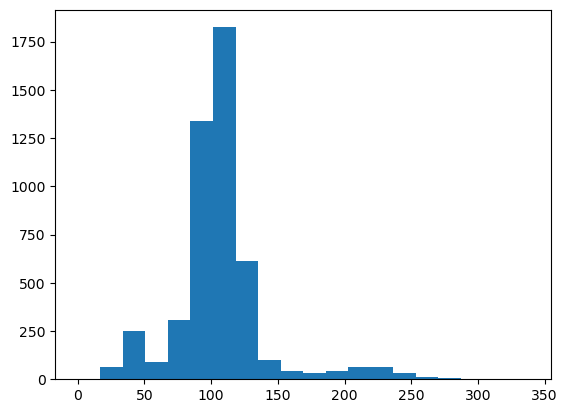

In [12]:
# plot the histogram of the bounding box dx, dy
dx = []
dy = []
areas = []  

for bbox in bboxes:
    dx.append(bbox[2] - bbox[0])
    dy.append(bbox[3] - bbox[1])
    areas.append((bbox[2] - bbox[0]) * (bbox[3] - bbox[1]))

dx = np.array(dx)
dy = np.array(dy)
areas = np.array(areas)

plt.hist(dx, bins=20)
print('dx mean:', np.mean(dx), 'dx std:', np.std(dx), 'dx mode: ', np.argmax(np.bincount(dx)))


dy mean: 101.62581833060557 dy std: 31.895930346890243 dy mode:  105


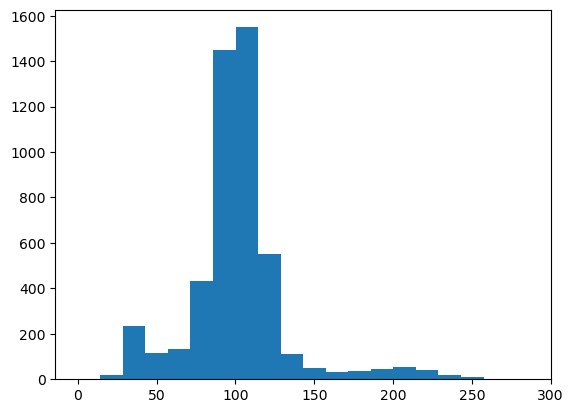

In [13]:
plt.hist(dy, bins=20)
print('dy mean:', np.mean(dy), 'dy std:', np.std(dy), 'dy mode: ', np.argmax(np.bincount(dy)))

In [14]:
import cv2

labels = []
bboxes = []

tree = ET.parse('../external_data/BCCD/Annotations/BloodImage_00000.xml')
for obj in tree.findall('object'):
    bbox = obj.find('bndbox')
    x1 = int(bbox.find('xmin').text)
    y1 = int(bbox.find('ymin').text)
    x2 = int(bbox.find('xmax').text)
    y2 = int(bbox.find('ymax').text)
    label = obj.find('name').text

    labels.append(label)
    bboxes.append([x1, y1, x2, y2])
    print(label, x1, y1, x2, y2)

image = cv2.imread('../external_data/BCCD/JPEGImages/BloodImage_00000.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

WBC 260 177 491 376
RBC 78 336 184 435
RBC 63 237 169 336
RBC 214 362 320 461
RBC 414 352 506 445
RBC 555 356 640 455
RBC 469 412 567 480
RBC 1 333 87 437
RBC 4 406 95 480
RBC 155 74 247 174
RBC 11 84 104 162
RBC 534 39 639 139
RBC 547 195 640 295
RBC 388 11 481 111
RBC 171 175 264 275
RBC 260 1 374 83
RBC 229 91 343 174
RBC 69 144 184 235
RBC 482 131 594 230
RBC 368 89 464 176


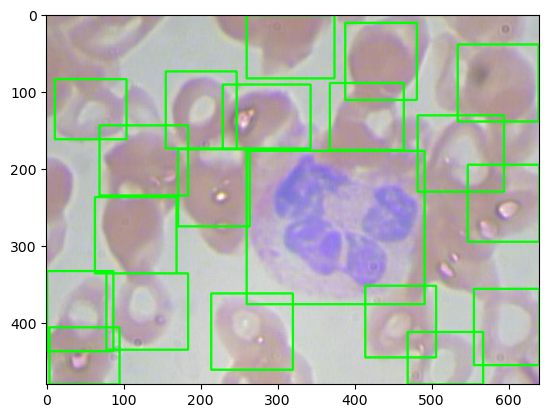

In [15]:
# overlay the bounding boxes on the image
for bbox in bboxes:
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

plt.imshow(image)